In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from src.utils import evaluate_model
import sys
import os

# Ensure src is accessible
sys.path.append(os.path.abspath(".."))

# -----------------------------------------
# Load processed datasets
# -----------------------------------------
fraud_df = pd.read_csv("../data/processed/train_ready.csv")
credit_df = pd.read_csv("../data/processed/creditcard_balanced_smote.csv")  # updated

In [10]:
# -----------------------------------------
# Prepare features and targets
# -----------------------------------------
X_fraud = fraud_df.drop(columns=["class"])
y_fraud = fraud_df["class"]

X_credit = credit_df.drop(columns=["Class"])
y_credit = credit_df["Class"]


In [11]:
# -----------------------------------------
# Train-test split
# -----------------------------------------
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
    X_fraud, y_fraud, test_size=0.2, stratify=y_fraud, random_state=42
)

X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(
    X_credit, y_credit, test_size=0.2, stratify=y_credit, random_state=42
)

In [13]:
# -----------------------------------------
# Define Models
# -----------------------------------------
log_reg = LogisticRegression(
    max_iter=3000,
    solver="saga",
    class_weight="balanced",
    random_state=42
)
log_reg_credit = LogisticRegression(
    max_iter=3000,
    solver="saga",
    class_weight="balanced",
    random_state=42
)

lgbm = LGBMClassifier(random_state=42)
lgbm_credit = LGBMClassifier(random_state=42)

In [14]:
# -----------------------------------------
# Train the Models
# -----------------------------------------
log_reg.fit(X_train_fraud, y_train_fraud)
lgbm.fit(X_train_fraud, y_train_fraud)

log_reg_credit.fit(X_train_credit, y_train_credit)
lgbm_credit.fit(X_train_credit, y_train_credit)


[LightGBM] [Info] Number of positive: 87654, number of negative: 87654
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 175308, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\yitbie\Desktop\10A\project\fraud-detection-project\.venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[LightGBM] [Info] Number of positive: 181961, number of negative: 181960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.146187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 363921, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initscore=0.000005
[LightGBM] [Info] Start training from score 0.000005


LGBMClassifier(random_state=42)


 Evaluation: Logistic Regression - Fraud
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.7536    0.9643    0.8460     21914
           1     0.9504    0.6848    0.7960     21914

    accuracy                         0.8245     43828
   macro avg     0.8520    0.8245    0.8210     43828
weighted avg     0.8520    0.8245    0.8210     43828

[Saved] ../reports/figures/models_fig/Logistic_Regression_-_Fraud_confusion_matrix.png


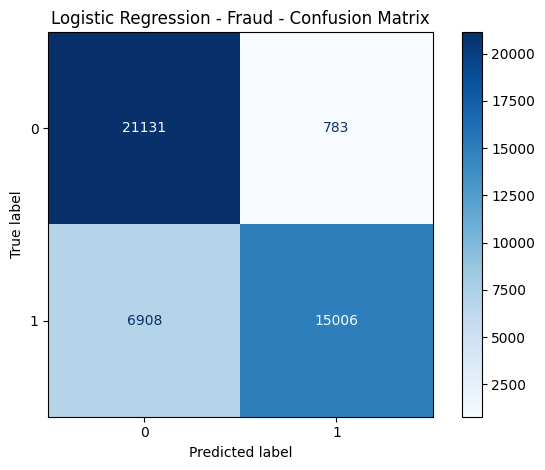

[Saved] ../reports/figures/models_fig/Logistic_Regression_-_Fraud_pr_curve.png


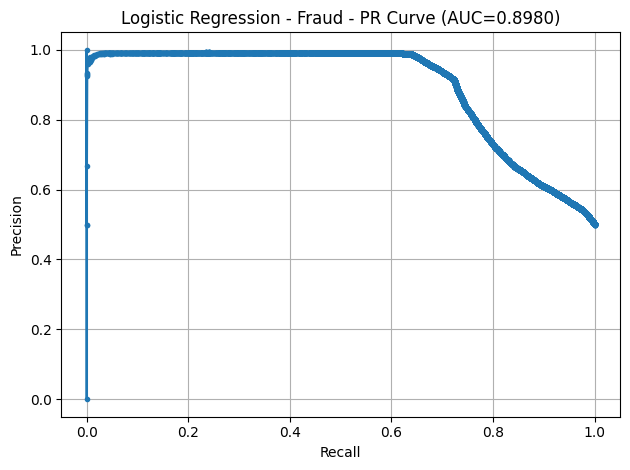


 Evaluation: LightGBM - Fraud
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.7794    0.9497    0.8562     21914
           1     0.9356    0.7313    0.8209     21914

    accuracy                         0.8405     43828
   macro avg     0.8575    0.8405    0.8385     43828
weighted avg     0.8575    0.8405    0.8385     43828

[Saved] ../reports/figures/models_fig/LightGBM_-_Fraud_confusion_matrix.png


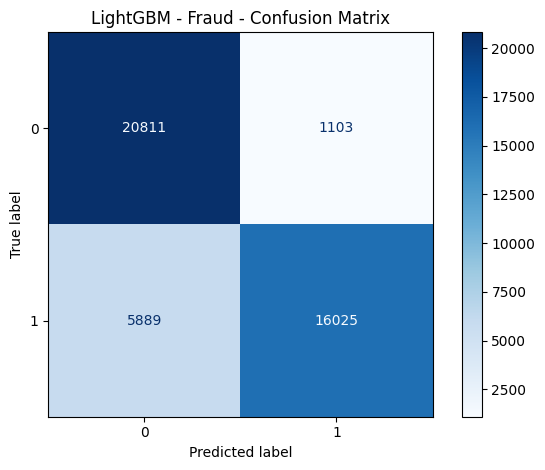

[Saved] ../reports/figures/models_fig/LightGBM_-_Fraud_pr_curve.png


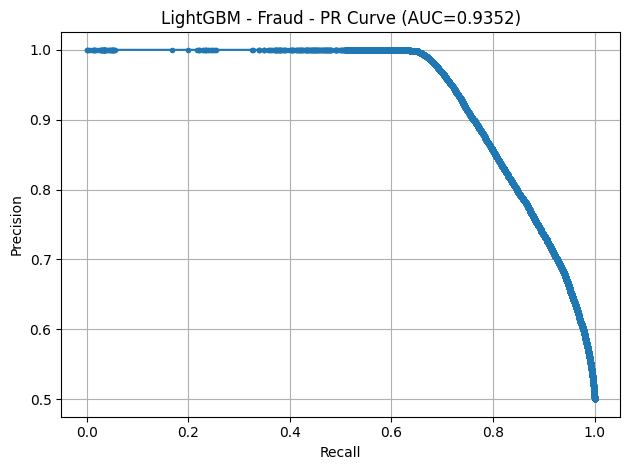


 Evaluation: Logistic Regression - Creditcard (SMOTE)
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8545    0.9873    0.9161     45491
           1     0.9850    0.8319    0.9020     45490

    accuracy                         0.9096     90981
   macro avg     0.9198    0.9096    0.9091     90981
weighted avg     0.9198    0.9096    0.9091     90981

[Saved] ../reports/figures/models_fig/Logistic_Regression_-_Creditcard_(SMOTE)_confusion_matrix.png


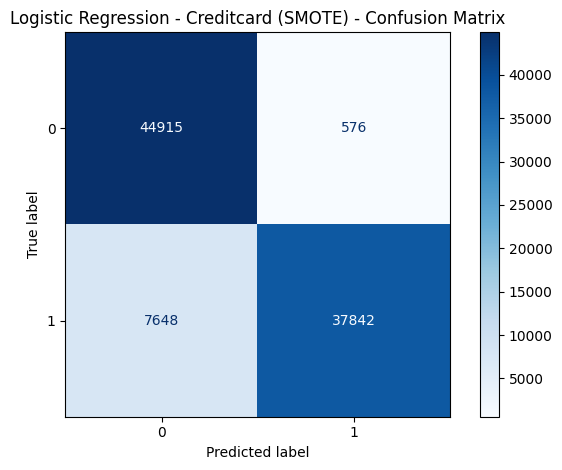

[Saved] ../reports/figures/models_fig/Logistic_Regression_-_Creditcard_(SMOTE)_pr_curve.png


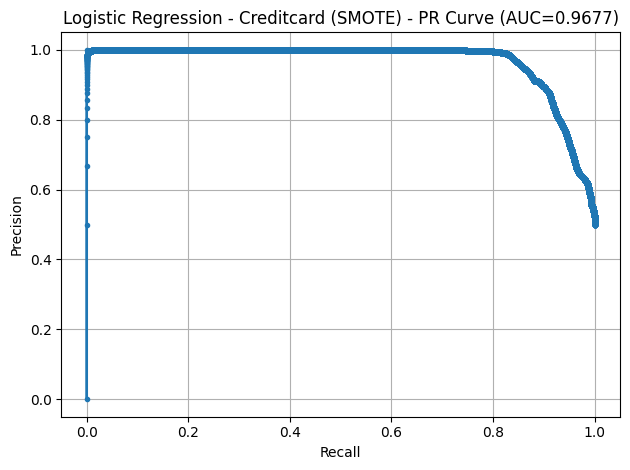


 Evaluation: LightGBM - Creditcard (SMOTE)
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.9999    0.9992    0.9996     45491
           1     0.9992    0.9999    0.9996     45490

    accuracy                         0.9996     90981
   macro avg     0.9996    0.9996    0.9996     90981
weighted avg     0.9996    0.9996    0.9996     90981

[Saved] ../reports/figures/models_fig/LightGBM_-_Creditcard_(SMOTE)_confusion_matrix.png


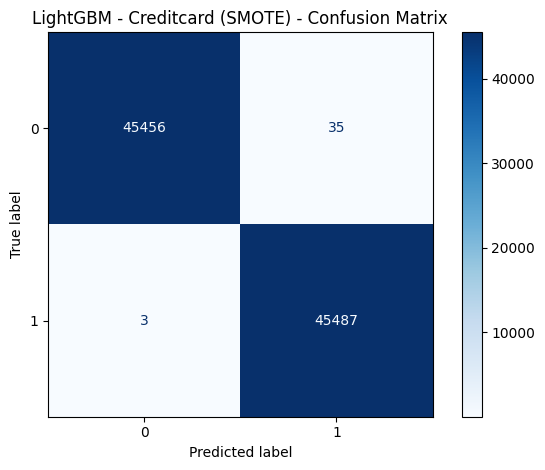

[Saved] ../reports/figures/models_fig/LightGBM_-_Creditcard_(SMOTE)_pr_curve.png


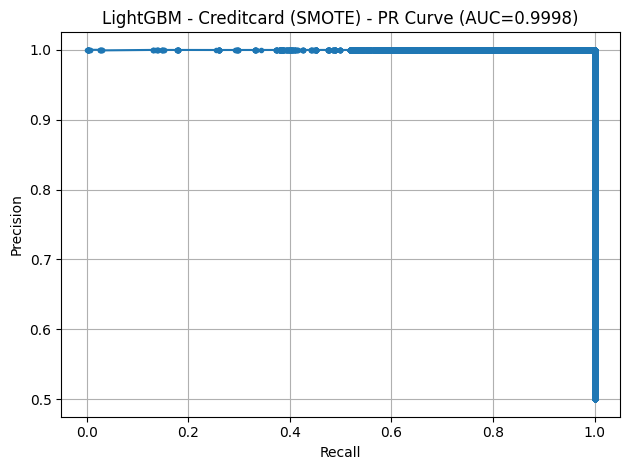

In [15]:
# -----------------------------------------
# Evaluate and Save Figures
# -----------------------------------------
FIG_DIR = "../reports/figures/models_fig/"
os.makedirs(FIG_DIR, exist_ok=True)

evaluate_model(log_reg, X_test_fraud, y_test_fraud, "Logistic Regression - Fraud", save_path=FIG_DIR)
evaluate_model(lgbm, X_test_fraud, y_test_fraud, "LightGBM - Fraud", save_path=FIG_DIR)

evaluate_model(log_reg_credit, X_test_credit, y_test_credit, "Logistic Regression - Creditcard (SMOTE)", save_path=FIG_DIR)
evaluate_model(lgbm_credit, X_test_credit, y_test_credit, "LightGBM - Creditcard (SMOTE)", save_path=FIG_DIR)
